<img src='https://visitor-badge.glitch.me/badge?page_id=shonenkovAI-Kandinsky-12b-public-v100' alt='visitor badge'>

**Author:** [Alex Shonenkov](https://www.kaggle.com/shonenkov)

**Telegram Channel:** https://t.me/shonenkovAI

**Discord Server:** https://discord.gg/xV7dNbT9NU 

In [1]:
!pip install ruclip==0.0.1 > /dev/null
!pip install rudalle==1.1.2 > /dev/null

In [2]:
import torch
!python --version
print('torch:', torch.__version__)
!pip freeze | grep rudalle
!pip freeze | grep ruclip
!pip freeze | grep transformers
!pip freeze | grep torchmetrics
!nvidia-smi

Python 3.7.12
torch: 1.6.0+cu101
rudalle==1.1.2
ruclip==0.0.1
taming-transformers==0.0.1
transformers==4.10.3
torchmetrics==0.5.1
Wed Jun 29 16:34:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.156.00   Driver Version: 450.156.00   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM3...  On   | 00000000:5C:00.0 Off |                    0 |
| N/A   33C    P0    49W / 350W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+-----

In [3]:
from rudalle.pipelines import generate_images, show
from rudalle import get_rudalle_model, get_tokenizer, get_vae
from rudalle.utils import seed_everything

In [4]:
KANDINSKY_TOKEN = '<unknown>'

In [5]:
device = 'cuda'
tokenizer = get_tokenizer()
vae = get_vae(dwt=False).to(device)

dalle = get_rudalle_model('Kandinsky', fp16=True, device=device, use_auth_token=KANDINSKY_TOKEN)

Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

tokenizer --> ready
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

vae --> ready


Downloading:   0%|          | 0.00/23.0G [00:00<?, ?B/s]

  0%|          | 0/1038 [00:00<?, ?it/s]

Kandinsky is large 12 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.


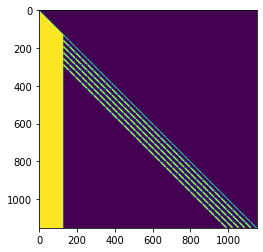

In [6]:
import matplotlib.pyplot as plt
plt.imshow(dalle.get_param('transformer').conv_mask.detach().cpu());

  0%|          | 0/1024 [00:00<?, ?it/s]

/home/jovyan/.local/lib/python3.7/site-packages/taming/modules/diffusionmodules/model.py:137: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output channels_last tensor even if some of the inputs are not in channels_last format. (Triggered internally at  /pytorch/aten/src/ATen/native/TensorIterator.cpp:924.)
  return x+h


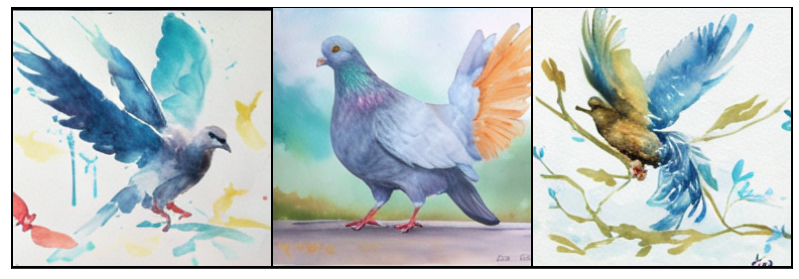

CPU times: user 1min 46s, sys: 17.6 s, total: 2min 3s
Wall time: 2min 4s


In [7]:
%%time

text = 'очень красивый голубь акварель'
seed_everything(42)
top_k, top_p = 768, 0.99
pil_images, _ = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=3, bs=3, top_p=top_p)
show(pil_images, 3)